今回利用するコンペのデータはこちらです。

ECサイト（オンラインストア）の購買データ

https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset

# データダウンロード

・データは、Kaggleの過去のコンペティションで使われたデータを利用します<br>
　そのため、必ずKaggleのアカウント作成をお願いします

・データ取得は、Kaggle APIを利用します。KaggleのAPIの使い方は下記を参照してください<br>
　https://take-tech-engineer.com/kaggle-colab-api/

In [3]:
# KaggleのAPIを利用ためのインストール
!pip install kaggle

In [4]:
# Googleドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# KaggleのAPIを利用するための設定
# 初回のみJSONファイルをダウンロードして、Google Driveに保存する必要がある

import os
import json

f = open("/content/drive/MyDrive/Colab Notebooks/kaggle.json", 'r')
json_data = json.load(f)
os.environ['KAGGLE_USERNAME'] = json_data['username']
os.environ['KAGGLE_KEY'] = json_data['key']

# データ準備

In [6]:
# 標準ライブラリ
import pandas as pd
import datetime as dt

In [13]:
# Kaggleの各コンペページから、APIコマンドを取得し実施
# 今回は「Doenload(8MB)」の横にある縦3点リーダの中にある「Copy API command」をクリックした取得した
!kaggle datasets download -d ulrikthygepedersen/online-retail-dataset

 68% 5.00M/7.38M [00:00<00:00, 46.1MB/s]
100% 7.38M/7.38M [00:00<00:00, 62.7MB/s]


In [14]:
# !unzip <ダウンロードしたZIPファイル>
!unzip '/content/online-retail-dataset.zip'

Archive:  /content/online-retail-dataset.zip
  inflating: online_retail.csv       


In [16]:
# 解凍したZIPには、CSVファイルが含まれている。CSVファイルを読み込んで、Pandasデータフレーム化する
df = pd.read_csv('/content/online_retail.csv')   # ディレクトリに注意
# df = pd.read_csv('online_retail.csv')  # ディレクトリに注意

# 確認用に出力
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [17]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [18]:
df.shape

(541909, 8)

In [19]:
# CSVファイルが複数存在する場合（マスタデータなど）は、テーブル同士をJOINして1つのデータフレームにする

In [20]:
# カラムごとの基準統計量
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [21]:
# カラム事の欠損値数 -> Description(商品名)と、CustomrIDに欠損がある
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [22]:
# 購買データ用処理
## マイナス値は返品等のため、除外してください

df = df.query('Quantity > 0 and UnitPrice >0')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# データ可視化

Matplotlibだけでも構いませんが、Seabornというライブラリを使うとより見やすいグラフが作成できるので、下記を参照してください。

https://udemy.benesse.co.jp/development/python-work/seaborn-python.html

下記データ可視化の処理が短時間で完了しない場合、最初の10000件のサンプルファイルで実施してください
```
df_sample = df.head(10000)
```

In [23]:
# データ見える化ライブラリ
import seaborn as sns
import matplotlib.pyplot as plt

# 上から1000レコードのデータを所得
df_sample = df.head(10000)
df_sample

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
10141,537225,21167,WHITE SAGE INCENSE,50,2010-12-05 16:41:00,0.21,12748.0,United Kingdom
10142,537225,22430,ENAMEL WATERING CAN CREAM,2,2010-12-05 16:41:00,4.95,12748.0,United Kingdom
10143,537225,51008,AFGHAN SLIPPER SOCK PAIR,10,2010-12-05 16:41:00,3.45,12748.0,United Kingdom
10144,537226,22811,SET OF 6 T-LIGHTS CACTI,6,2010-12-06 08:34:00,2.95,15987.0,United Kingdom


<ipython-input-24-816172f04777>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['Purchase_amount'] = df_sample['UnitPrice'] * df_sample['Quantity']


<Axes: >

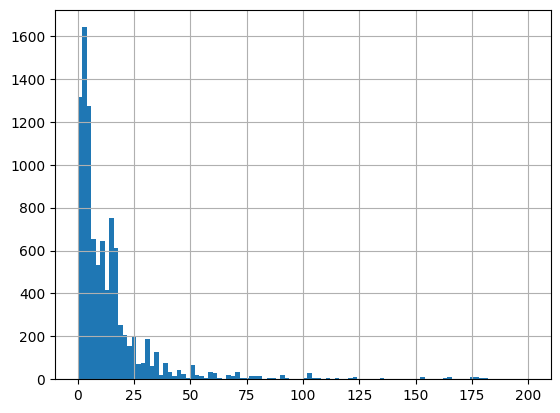

In [24]:
# ヒストグラム
# レコードごとの購入金額（UnitPrice * Quantity)をX軸に描写

df_sample['Purchase_amount'] = df_sample['UnitPrice'] * df_sample['Quantity']
df_sample['Purchase_amount'].hist(bins=100, range=(0, 200))

<ipython-input-25-5c3697426068>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sample_country = df_sample.groupby('Country', as_index=False).sum()


<Axes: xlabel='Country'>

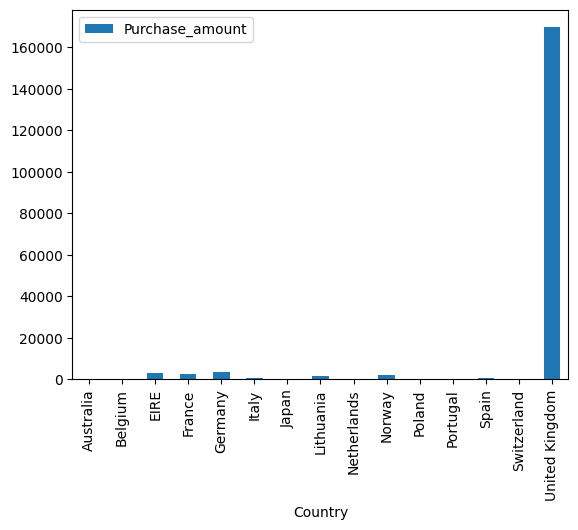

In [25]:
# 棒グラフ
# 国ごとをX軸、総購入金額をY軸に描写

df_sample_country = df_sample.groupby('Country', as_index=False).sum()
df_sample_country.plot.bar('Country', 'Purchase_amount')

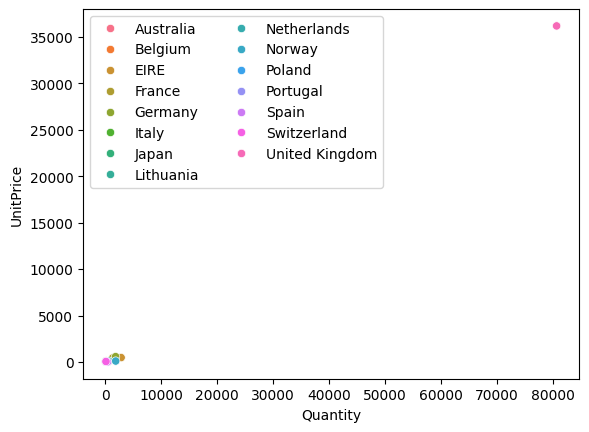

In [26]:
# 散布図
# 個数をX軸、単価をY軸に設定、ポイントの色を国で分けて描写
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Country', data=df_sample_country)
plt.legend(loc='best', ncol=2)

<Axes: xlabel='Country', ylabel='Purchase_amount'>

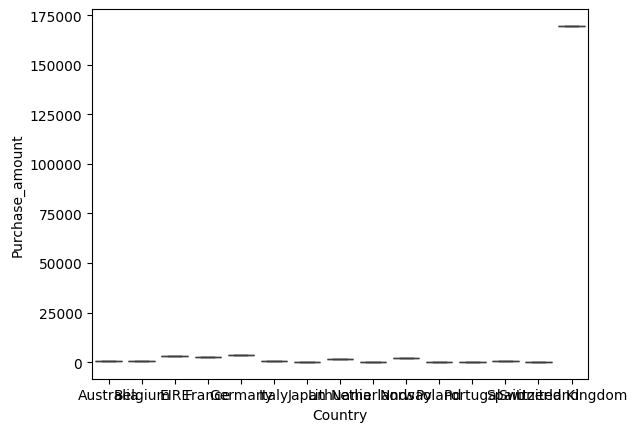

In [27]:
# 箱ひげ図
# 国ごとをX軸、総購入金額をY軸に描写
sns.boxplot(x='Country', y='Purchase_amount', data=df_sample_country)

<Axes: xlabel='Quantity'>

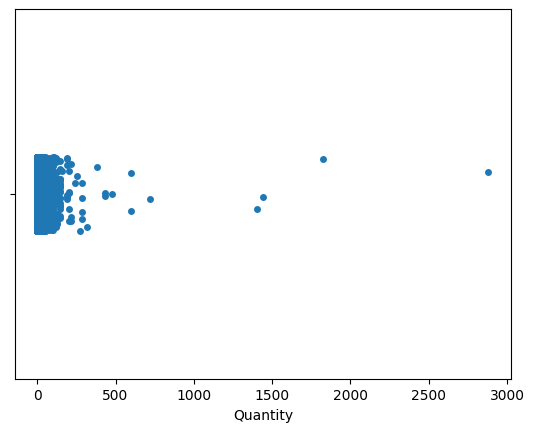

In [28]:
#　購入量の分布を可視化
# ほとんどのデータが500個以内におさまっている
sns.stripplot(x='Quantity', data=df_sample)

In [60]:
# 大口の購入と思われ、今後の同様のケースは考えられるため、外れ値としての除外は不要と思われるが、
# 相関を左右するようであれば除外を検討
df_sample.query('Quantity>=1000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchase_amount
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom,1003.2
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom,518.4
4946,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754.0,United Kingdom,1484.0
6365,536890,17084R,ASSORTED INCENSE PACK,1440,2010-12-03 11:48:00,0.16,14156.0,EIRE,230.4


<Axes: xlabel='UnitPrice'>

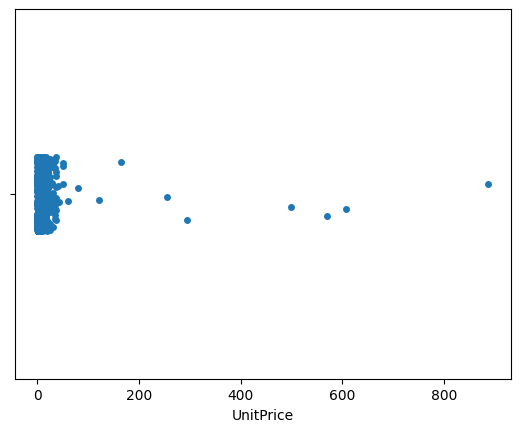

In [57]:
#　単価の分布を可視化
#　一部200以上のものが散見される
sns.stripplot(x='UnitPrice', data=df_sample)

In [59]:
# 一部CustomIDがついていないものがある。
# 'Description'の表記からして輸送量と判断できる
# ->　商品の購入傾向の分析に必要ないと思われ、外れ値としての除外されるべきと思われる。
df_sample.query('UnitPrice>=200')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchase_amount
1814,536544,DOT,DOTCOM POSTAGE,1,2010-12-01 14:32:00,569.77,NaN,United Kingdom,569.77
3041,536592,DOT,DOTCOM POSTAGE,1,2010-12-01 17:06:00,607.49,NaN,United Kingdom,607.49
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-02 18:06:00,295.00,13145.0,United Kingdom,295.00
5450,536862,DOT,DOTCOM POSTAGE,1,2010-12-03 11:13:00,254.43,NaN,United Kingdom,254.43
5685,536865,DOT,DOTCOM POSTAGE,1,2010-12-03 11:28:00,498.47,NaN,United Kingdom,498.47
6165,536876,DOT,DOTCOM POSTAGE,1,2010-12-03 11:36:00,887.52,NaN,United Kingdom,887.52


In [29]:
# Quantity <=500に絞る

# df_sample_mod = df_sample.query('Quantity <=500')
# # `DOTCOM POSTAGE`を削除
# df_sample_mod = df_sample_mod.query('Description != "DOTCOM POSTAGE"')
# df_sample_mod['Purchase_amount'] = df_sample_mod['UnitPrice'] * df_sample_mod['Quantity']
# # レコードごとの購入金額（UnitPrice * Quantity)をX軸に描写
# df_sample_mod_country = df_sample_mod.groupby('Country', as_index=False).sum()
# df_sample_mod

In [30]:
# # 箱ひげ図
# # 国ごとをX軸、総購入金額をY軸に描写
# sns.boxplot(x='Country', y='Purchase_amount', data=df_sample_mod_country)

# データ集計・分析

次の内容を、Python（主にPandas）と、SQLを使ってそれぞれ集計してください。（両方が難しい場合は、どちらか一方でも構いません。）

データ集計・分析では、df_sampleではなくdfを使うようにしてください

## 参考

Pythonファイル内でSQLを用いる方法

```
%%bash
pip install duckdb-engine
```

```
# ライブラリインポート
import duckdb
```

```
# SQL実行
df_output = duckdb.query(
  f"""
  SELECT -- ここに必要な処理を書く
  FROM df -- テーブルには、Pandasのデータフレームを利用
  """
).to_df()
```

In [31]:
!pip install duckdb-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 1.5 MB/s eta 0:00:00


In [32]:
import duckdb

In [33]:
df[df['Description'].str.contains('WHITE HANGING')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom
...,...,...,...,...,...,...,...,...
537291,581246,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-12-08 10:59:00,2.95,15453.0,United Kingdom
537326,581253,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-12-08 11:15:00,2.95,16891.0,United Kingdom
537852,581356,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-08 12:28:00,2.95,17830.0,United Kingdom
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-12-08 18:03:00,2.55,17675.0,United Kingdom


In [42]:
# 1. 2011年1～6月の期間における、商品（StockCode, Description）ごとの合計売上金額を算出し、金額が高い順に順位をつけてください
"""
pandas
"""
df_pd_output1 = df.copy()
df_pd_output1['InvoiceDate'] = pd.to_datetime(df_pd_output1['InvoiceDate'])
df_pd_output1 = \
    df_pd_output1[(df_pd_output1['InvoiceDate'] >= dt.datetime(2011, 1, 1)) &
     (df_pd_output1['InvoiceDate'] < dt.datetime(2011, 7, 1))]
df_pd_output1['Purchase_amount'] = df_pd_output1['Quantity'] * df_pd_output1['UnitPrice']
df_pd_output1 = df_pd_output1.groupby('Description', as_index=False).sum()
df_pd_output1.sort_values('Purchase_amount', ascending=False)

<ipython-input-42-5124097b3164>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pd_output1['Purchase_amount'] = df_pd_output1['Quantity'] * df_pd_output1['UnitPrice']
<ipython-input-42-5124097b3164>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pd_output1 = df_pd_output1.groupby('Description', as_index=False).sum()


,Description,Quantity,UnitPrice,CustomerID,Purchase_amount
2466,REGENCY CAKESTAND 3 TIER,6431,13213.260,12481337.0,79386.400
1763,MEDIUM CERAMIC TOP STORAGE JAR,75413,94.040,921615.0,78548.050
925,DOTCOM POSTAGE,383,65425.440,0.0,65425.440
2073,PARTY BUNTING,10796,5453.910,12083507.0,58246.570
3229,WHITE HANGING HEART T-LIGHT HOLDER,18974,3397.450,14628046.0,52154.700
...,...,...,...,...,...
617,CHERUB HEART DECORATION GOLD,1,0.830,12709.0,0.830
224,ASSTD RASTA KEY-CHAINS,1,0.420,12748.0,0.420
1458,HEN HOUSE W CHICK IN NEST,1,0.420,17841.0,0.420
2795,SILICON STAR BULB BLUE,1,0.420,17346.0,0.420


In [36]:
"""
SQL
"""
# SQL実行
df_sql_output1 = duckdb.query(
    f"""
  SELECT
  Description,
  sum(Quantity) as Quantity,
  sum(UnitPrice) as UnitPrice,
  sum(Quantity * UnitPrice) as Purchase_amount
  FROM df
  where InvoiceDate between '2011-01-01 00:00:00' AND '2011-06-31 23:59:59'
  group by Description
  order by Purchase_amount desc
  """
).to_df()
df_sql_output1

,Description,Quantity,UnitPrice,Purchase_amount
0,REGENCY CAKESTAND 3 TIER,6431.0,13213.260,79386.400
1,MEDIUM CERAMIC TOP STORAGE JAR,75413.0,94.040,78548.050
2,DOTCOM POSTAGE,383.0,65425.440,65425.440
3,PARTY BUNTING,10796.0,5453.910,58246.570
4,WHITE HANGING HEART T-LIGHT HOLDER,18974.0,3397.450,52154.700
...,...,...,...,...
3375,"LETTER ""O"" BLING KEY RING",1.0,0.830,0.830
3376,ASSTD RASTA KEY-CHAINS,1.0,0.420,0.420
3377,SILICON STAR BULB BLUE,1.0,0.420,0.420
3378,HEN HOUSE W CHICK IN NEST,1.0,0.420,0.420


In [ ]:
# 2. #1で出した売り上げ金額が高い順に並べて、金額の累計が総売上金額の70%以下をAランク、70~90%以下をBランク、それ以降をCランクとしてラベルをつけてください
# 売り上げの70%が上位何%の商品数で占められているかを計算してください

# 参考：https://gmo-research.jp/research-column/abc-analysis

In [43]:
"""
SQL
"""

df_sql_output2 = duckdb.query(
    f"""SELECT
  Description,
  Quantity,
  UnitPrice,
  Purchase_amount,
  SUM(Purchase_amount) OVER (ORDER BY Purchase_amount DESC) as Cumulative_purchase_amount,
  Cumulative_Purchase_amount * 100.0 / SUM(Purchase_amount) OVER() as Purchase_amount_ratio,
  CASE WHEN Purchase_amount_ratio <= 70 then 'A'
  WHEN Purchase_amount_ratio > 70 AND Purchase_amount_ratio <= 90 then 'B'
  ELSE 'C'
  END as 'ABC_rank'
  FROM df_sql_output1
  ORDER BY Purchase_amount_ratio
  """
).to_df()

total_products = df_sql_output2.shape[0]
total_rankA_products = df_sql_output2.query('ABC_rank=="A"').shape[0]
ratio_rank_A = round((total_rankA_products / total_products) * 100, 2)
print(f'売り上げの70%は上位{ratio_rank_A}%の商品数')

売り上げの70%は上位13.05%の商品数


In [46]:
"""
Pandas
"""


def define_abc_rank(x):
    if x <= 70:
        return 'A'
    elif x > 70 and x <= 90:
        return 'B'
    else:
        return 'C'


df_pd_output2 = df_pd_output1.copy()
df_pd_output2 = df_pd_output2.sort_values('Purchase_amount', ascending=False)
df_pd_output2['Cumulative_purchase_amount'] = df_pd_output2['Purchase_amount'].cumsum()
df_pd_output2['Purchase_amount_ratio'] = df_pd_output2['Cumulative_purchase_amount'] * 100 / sum(
    df_pd_output2['Purchase_amount'])
df_pd_output2['ABC_rank'] = df_pd_output2['Purchase_amount_ratio'].apply(define_abc_rank)

total_products = df_pd_output2.shape[0]
total_rankA_products = df_pd_output2.query('ABC_rank=="A"').shape[0]
ratio_rank_A = round((total_rankA_products / total_products) * 100, 2)
print(f'売り上げの70%は上位{ratio_rank_A}%の商品数')

売り上げの70%は上位13.05%の商品数


In [40]:
# 3. すべての期間において、顧客ごとの購入金額を算出し、金額が高い順に同じ人数になるように、10グループを作成してください

In [53]:
"""
pandas
"""
df_pd_output3 = df.copy()
df_pd_output3['Purchase_amount'] = df_pd_output1['Quantity'] * df_pd_output3['UnitPrice']
df_pd_output3 = df_pd_output3.groupby('CustomerID', as_index=False).sum()
df_pd_output3 = df_pd_output3.sort_values('Purchase_amount', ascending=False).reset_index(drop=True)
group_no = df_pd_output3.shape[0] // 10  # １グループの数を計算->あまりの人数はグリープに入れず
df_pd_output3['group_label'] = df_pd_output3.index // group_no + 1
df_pd_output3 = df_pd_output3.query('group_label<=10')
df_pd_output3

<ipython-input-53-92f9473e4b3a>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pd_output3 = df_pd_output3.groupby('CustomerID', as_index=False).sum()


,CustomerID,Quantity,UnitPrice,Purchase_amount,group_label
0,17850.0,1733,1176.23,255161.09,1
1,17346.0,1657,1199.83,206500.52,1
2,17841.0,23071,19848.49,197166.22,1
3,14606.0,6224,7595.75,179645.27,1
4,17920.0,2516,1623.75,163093.21,1
...,...,...,...,...,...
4325,14342.0,347,60.70,0.00,10
4326,14344.0,477,300.02,0.00,10
4327,14345.0,50,20.94,0.00,10
4328,14346.0,605,276.14,0.00,10


In [54]:
"""
SQL

"""
df_sql_output3 = duckdb.query(
    f"""
  SELECT
  SUM(Quantity) as Quantity,
  SUM(UnitPrice) as UnitPrice,
  SUM(Quantity * UnitPrice) as Purchase_amount,
  NTILE(10) OVER (ORDER BY Purchase_amount DESC) AS group_label
  FROM df
  GROUP BY CustomerID
  ORDER BY Purchase_amount DESC
  """
).to_df()
df_sql_output3

,Quantity,UnitPrice,Purchase_amount,group_label
0,420564.0,831447.16,1755276.64,1
1,196915.0,5176.09,280206.02,1
2,64124.0,1940.92,259657.30,1
3,69993.0,1143.32,194550.79,1
4,80997.0,4.98,168472.50,1
...,...,...,...,...
4334,12.0,4.75,13.30,10
4335,1.0,12.75,12.75,10
4336,3.0,3.95,6.90,10
4337,2.0,6.20,6.20,10


In [56]:
"""
課題点
pdの方ではすべてのグループが433人毎に分けられているが、
sqlの方では9グループ434人毎で、残りの1グループが433人になってしまう。
"""
df_pd_output3.groupby('group_label').count(), df_sql_output3.groupby('group_label').count()

(             CustomerID  Quantity  UnitPrice  Purchase_amount
 group_label                                                  
 1                   433       433        433              433
 2                   433       433        433              433
 3                   433       433        433              433
 4                   433       433        433              433
 5                   433       433        433              433
 6                   433       433        433              433
 7                   433       433        433              433
 8                   433       433        433              433
 9                   433       433        433              433
 10                  433       433        433              433,
              Quantity  UnitPrice  Purchase_amount
 group_label                                      
 1                 434        434              434
 2                 434        434              434
 3                 434        434      

In [ ]:
# 4. すべての期間において、顧客ごとのRFM分析（R:最終購入日、F:購入回数、M:購入金額）を行ってください

In [ ]:
# 5. すべての期間において、国ごとの総売り上げを月の順番で並べてください

In [ ]:
# 6. 2011年1～6月の期間における、購入者が500人以上の商品のうち、最もファンが多い順に並べてください
# ヒント：リピート率（https://www.tsuhan-marketing.com/blog/basic/regarding_repeatrate）

In [ ]:
# 7. 2011年における、購買の売上分解ツリー（売上のロジックツリー）を作成してください
# ツリーの描写は不要です。必要な項目を出力してください

In [ ]:
# 8. 2011年1～6月の期間において、バスケット分析を行ってください

In [ ]:
# 9. 2011年1～6月を前期間、7～12月を後期間にして、「84406B」（CREAM CUPID HEARTS COAT HANGER）の商品を前期間に購入した人が、後期間に購入した商品を分析してください

In [ ]:
# 下記は難易度高なので、できればでOKです。

# 10. 購買の傾向をもとに、商品同士のネットワーク図を作成してください
# ネットワーク図：https://www.sejuku.net/blog/91371
#
# ※この分析は、SQLとPythonそれぞれではなく、組み合わせて分析してください